## Online Reatail Dataset
#### Goal:Analyze sales transcations,detect outliers in quantity/price ,and understand customer behavior


#### Load Dataset

In [8]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [9]:
# importing and loading
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# Overview 
print("Shape:",df.shape)

#info 
print("Info:",df.info())

#Summary stats
df.describe()

# Missign Values

print(df.isnull().sum())

#drop duplicates
df=df.drop_duplicates()

Shape: (536641, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB
Info: None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


##### Insight
some missing values in Customer id and descriptor vlaues may exit



### Missing value analysis 

In [12]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) *100

})
missing.sort_values(by='missing_percent',ascending=False)




,missing_count,missing_percent
CustomerID,135037,25.163377
Description,1454,0.270945
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


### Handle Missing values

In [14]:
# Drop rows where CustomerID is missing
df = df.dropna(subset=['CustomerID'])

# Fill missing Description with a placeholder
df['Description'] = df['Description'].fillna('Unknown')


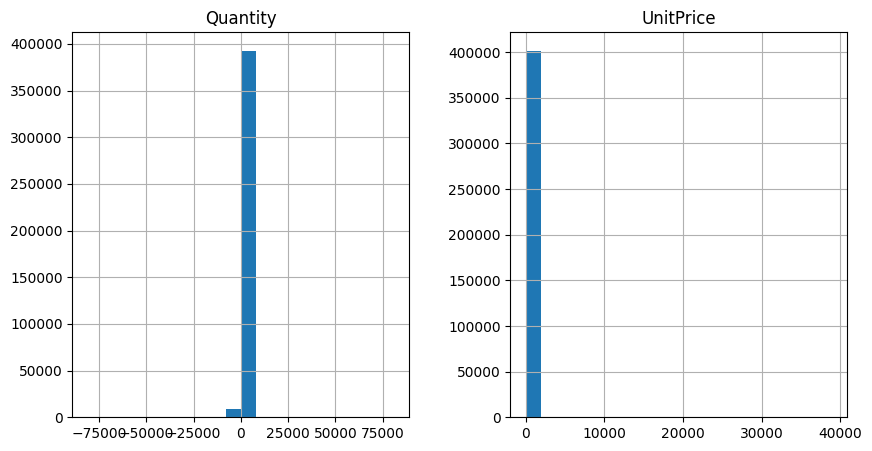

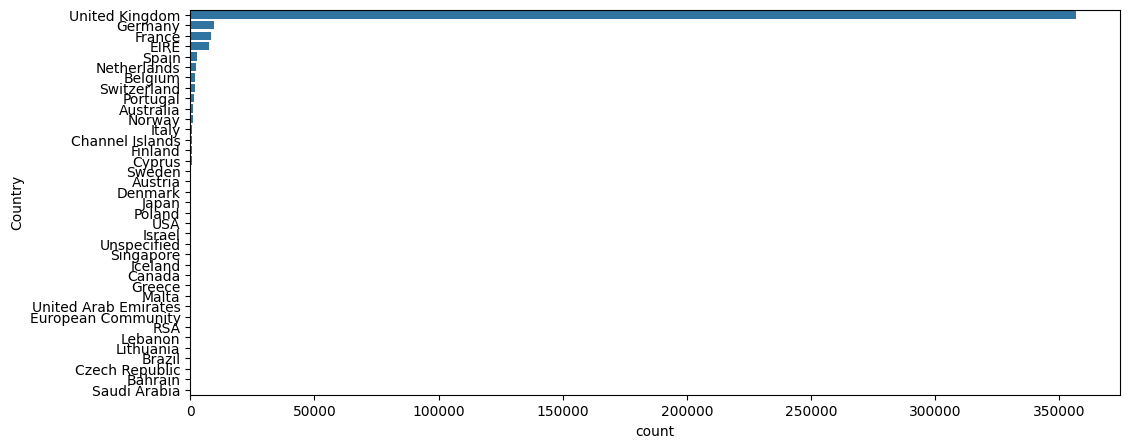

In [16]:
# Distribution of numerical columns
numeric_cols = ['Quantity', 'UnitPrice']
df[numeric_cols].hist(figsize=(10,5), bins=20)
plt.show()

# Count of transactions by Country
plt.figure(figsize=(12,5))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.show()


##### insight
UK has the most transactions.

Quantity and UnitPrice distributions show most transactions are small quantities at low prices

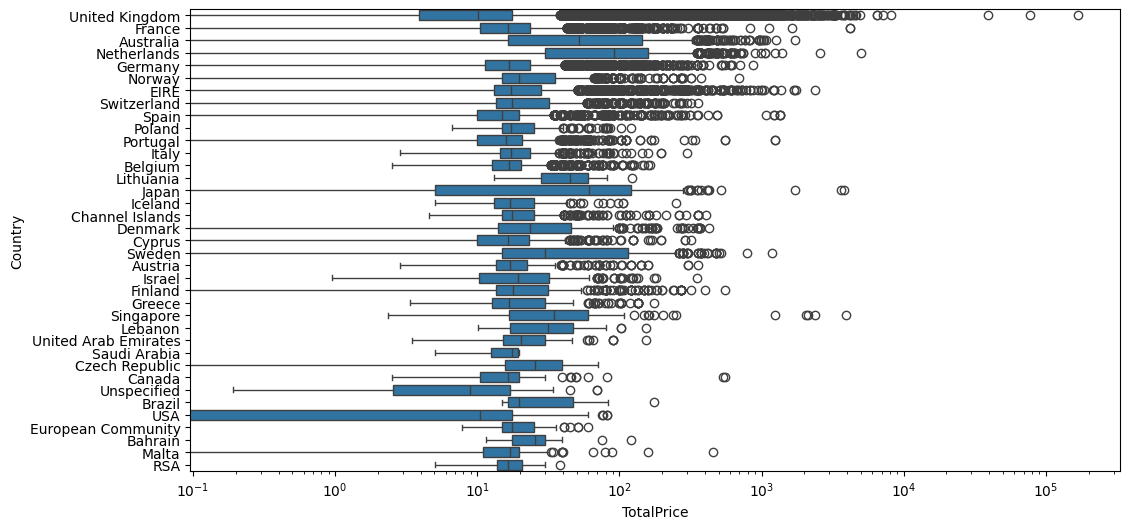

In [17]:
# Total sales per invoice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Boxplot of TotalPrice by Country
plt.figure(figsize=(12,6))
sns.boxplot(x='TotalPrice', y='Country', data=df)
plt.xscale('log')  # for better visualization
plt.show()


#### Insights
Most transactions are small, but a few very high-value invoices (outliers) exist.

Outliers usually represent bulk orders or returns with negative quantities.

### Outlier treat


Outliers in Quantity: 26646


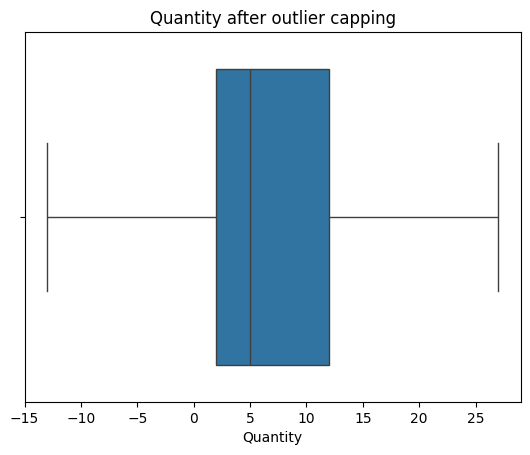

Outliers in UnitPrice: 35802


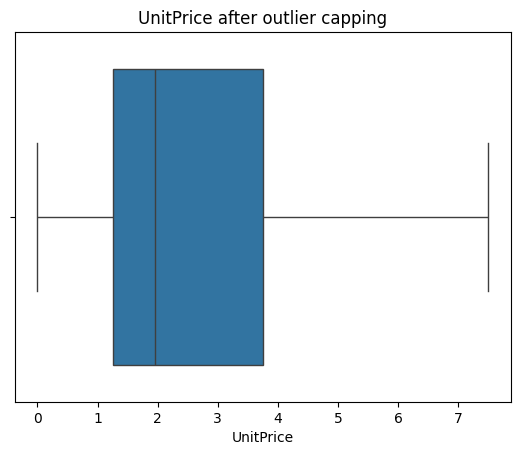

Outliers in TotalPrice: 32938


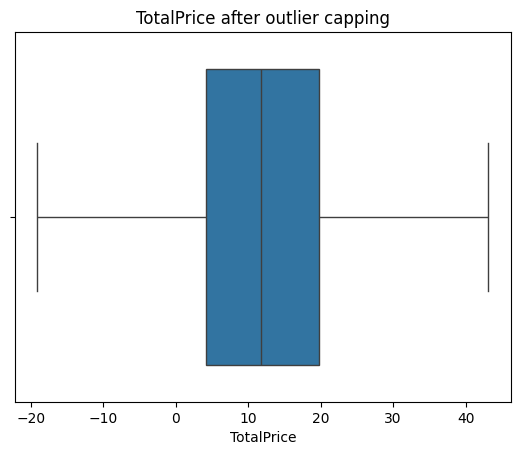

In [20]:
# Detect outliers in Quantity and UnitPrice
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {outliers.shape[0]}")
    df[col]=df[col].clip(lower,upper)
    sns.boxplot(x=df[col])
    plt.title(f"{col} after outlier capping")
    plt.show()

### Feature Engieneering

In [22]:
# Extract InvoiceDate features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
